## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 


<a id='probability'></a>
#### Part I - Probability

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read both CSV files and mearge them
# Print out first few lines
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df[df['converted'] == 1].shape[0]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
old_page_count = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')].shape[0]

In [7]:
new_page_count = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')].shape[0]

In [8]:
old_page_count + new_page_count

3893

f. Do any of the rows have missing values?

In [9]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
# check for null values
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
df2 = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page') | (df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2.user_id[1899]

773192

c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2['user_id']==773192].index.values.astype(int)

array([1899, 2893])

In [17]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [18]:
df2[df2['user_id'] == 773192].index

Int64Index([1899, 2893], dtype='int64')

In [19]:
df2.shape[0]

290585

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
df2 = df2.drop_duplicates(subset='user_id', keep='first')
df2.shape[0]

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [22]:
df2[df2['converted'] == 1].count()

user_id         34753
timestamp       34753
group           34753
landing_page    34753
converted       34753
dtype: int64

In [23]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [25]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [26]:
df2[df2['landing_page'] == 'new_page'].count()/df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Below is the statement to conclude if new page leads to more conversions:**

New and Old page are in a 50/50 relationship. Comparing the ratio of converstion of old when compared with new page  it can be seen the new page is leading to less conversions!

Below are the results from analysis of tasks performed:

* The over all probabilty of converting is : **11.96%**
* Given that an individual was in the control group, what is the probability they converted is : **12.04%**
* Given that an individual was in the treatment group, what is the probability they converted is: **11.89%**
* The difference among the control group and treatment group is very minimal comprising of **0.15%** which is approximatly zero, which gives us a 50/50 relationship among old and new landing page.

* This is not enough to conclude if the new page lease to more conversions!

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis:**   $$H_{0}: p_{new} - p_{old} <= 0$$
**Alternative Hypothesis:**   $$H_{1}: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [41]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br>

In [42]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [43]:
n_new = df2[df2['group'] == 'treatment']['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [44]:
n_old = df2[df2['group'] == 'control']['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [68]:
new_page_converted = np.random.binomial(n_new,p_new)
new_page_converted

17363

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [72]:
old_page_converted = np.random.binomial(n_old,p_old)
old_page_converted

17450

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [73]:
new_page_converted/n_new - old_page_converted/n_old

-0.0006284787176791817

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [74]:
df2.shape[0]

290584

In [82]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)/n_new
    old_page_converted = np.random.binomial(n_old,p_old)/n_old
    diffs = new_page_converted - old_page_converted
    p_diffs.append(diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

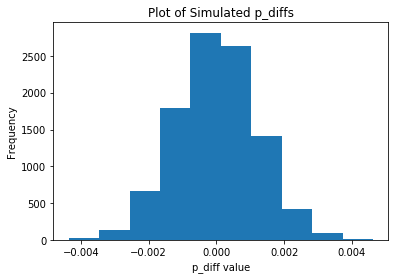

In [83]:
p_diffs = np.array(p_diffs)

plt.xlabel('p_diff value')
plt.ylabel('Frequency')
plt.title('Plot of Simulated p_diffs');
plt.hist(p_diffs);

**Plot is dsitributed normally**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [89]:
# Calculate the actual difference observed in ab_data.csv

actual_converted_old_mean = df[df['group'] == 'control']['converted'].mean()
actual_converted_new_mean = df[df['group'] == 'treatment']['converted'].mean()

act_diff = actual_converted_new_mean - actual_converted_old_mean

In [95]:
#convert list to array
p_diffs = np.array(p_diffs)

# Simulate distribution under the null hypothesis

null_vals = np.random.normal(0, np.std(p_diffs), p_diffs.size)

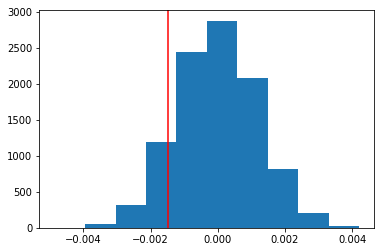

In [97]:
# Plot the null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(act_diff, c='red');

In [99]:
# compute p value
(null_vals > act_diff).mean()

0.8891

**k.** Please explain using the vocabulary you've learned in this course what you just computed in part 


**j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer** We computed p-value, p_value for p_diffs which are greater than obslete values obervsed in dataframe.

According to definition of p-value:

P-value is is the probability of observing the statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

**We assumed that:**

$$p_{new} = p_{old}$$

which complies similar to null hypothesis that both pages have similar converting for sampling distribution.

Actions performed are defined as below:

* Boostrapped a sampling distribution for both old_page and new_page.
* Calculated the differences in the converting mean of both page individually.


There is no significant satistical difference bwtween new and old page, because the p-value is closer to Type I error bound "alpha" i.e 5%.

This complies that we dont have enough evidence to state that we can reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [100]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

convert_old = df2[df2['group'] == 'control'].converted.sum()
convert_new = df2[df2['group'] == 'treatment'].converted.sum()

n_old = df2[df2['landing_page'] == 'old_page'].converted.count()
n_new = df2[df2['landing_page'] == 'old_page'].converted.count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [101]:
from scipy.stats import norm

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = "smaller")

### cdf will tell the signifigance of z score, and ppf will indicate the critical z score/value at confidence level 95%

In [102]:
z_score, p_value, norm.cdf(z_score), norm.ppf(1-(0.05)/2)

(1.2863207858559254,
 0.90083443441123368,
 0.90083443441123368,
 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**  We fail to reject the null hypothesis in our concluded z test, because of the following reason:

* Our calculated z-score value which is 1.3 is less the critical z-score value which is 1.9.

Therfore we accept the null hypothesis that the coversion rates of the new page are equal or less than the conversion rates of the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** **Logistic Regression**

Because there are two kinds of conversions conversion or no conversion, so dummy variables would be added into Logistic regression model.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [118]:
df3 = df2.copy()
df3.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [119]:
df3["intercept"] = 1

df3 = df3.join(pd.get_dummies(df3['group']))

df3 = df3.join(pd.get_dummies(df3.landing_page))

In [120]:
df3.rename(columns = {"treatment": "ab_page"}, inplace=True)
df3 = df3.drop('control', 1)

In [121]:
df3.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [122]:
model = sm.Logit(df3.converted, df3[['intercept', 'ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [123]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-07 17:02 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>

**Answer:**   The **p-value** associated with ab_page is **0.1899**.

* The Part 2 is one sided test because we are only concerned it the value is greater than.
* Part 3 is a two sided test, we are concerned about difference in either direction, whether the value is greater than or less than, also because the null hypothesis is that there is no significant relationship between the conversion and ab_page as sated by analysis.
* Analyzing the p-value we can state, that the conversion is not **significant** enough and is not dependent on the version of page.

#### Now we find left side tail in PART 3 test -> (1 - (ab_page p value)/2) which is approximately 0.905 and similar would be the case for PART 2 test where p-value was nearly 0.9008. This gives us a frame idea how these 2 test are associated with each other and how they both differ by type od testing.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**  

Adding other factors to regression model although will bring more light to whether or not a person converts, this ultimatly will help in making the model precise and increase accuracy by stating if we reject the null hypothesis or fail to reject it.

On the disadvantages side I would say p-value can get affected by adding more and more factors to regression model. Which also can lead to bring multi-colinerality among variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [124]:
countries_df = pd.read_csv("countries.csv")
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [125]:
new_df = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [126]:
new_df.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [127]:
#Adding dummies
new_df['intercept'] = 1
new_df = new_df.join(pd.get_dummies(new_df.country))
new_df = new_df.join(pd.get_dummies(new_df.landing_page))
new_df = new_df.join(pd.get_dummies(new_df.group))
                     
new_df.rename(columns = {"treatment": "ab_page"}, inplace=True)

In [128]:
lm = sm.Logit(new_df['converted'], new_df[['intercept', 'CA','UK']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-07 17:02 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

**h.** Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [130]:
#Add higher order variables to conclude the significance

new_df['UK_ab_page'] = new_df['UK']*new_df['ab_page']
new_df['US_ab_page'] = new_df['US']*new_df['ab_page']

log_mod2 = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'UK_ab_page']])
results2 = log_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-07 17:03 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

**Answer:**  To conclude whether the interaction between countries and pages leads to more conversion or not,

* The p values are still greater than alpha, which complies you should fail to reject H0(null hypothesis), meaning there is no significant effect on conversion.

* p-value being less the Type 1 error bound(Alpha) i.e 0.5 signifies that there is no significant impact between cuntries.

* US per conversion is merely 0.05 increase than that of UK. 

## Part IV - Conclusion

**Conclusion** : 

* We failed to reject Null Hypothesis because of no significant difference in conversion rates among new page and old page.
* Via analysis we concluded that there is decreasing converstion rates as compared to control. Analysis provides enough evidence on New page's failure. The new page has less not null advantages over old page.

I would suggest the company to not to launch the new page and instead keep old_page as the result shows new page does not have many conversions or can say less conversions that previous page.

It is suggested by results that Old_page should be maintained over time to bring better results.

## Submission

In [131]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0